# *Cardiovascular Disease Prediction ❤️*

In [224]:
# For setting theme💖
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')
# Themes : chesterish, grade3, gruvboxd, gruvboxl, manokai, oceans16, onedork, solarizedd, solarizedl

*1. Importing Libraries*

In [122]:
import pandas as pd
import seaborn as sns
import joblib
import numpy as np
import lime
import lime.lime_tabular
import shap
import eli5
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

*2. Importing Dataset*

In [123]:
df = pd.read_csv('./dataset/dummy_data.csv')

In [124]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,143.0,53.0,69.0,10.6,2.07,84.6,23,1,0
1,100.0,81.0,53.0,16.2,1.89,63.2,26,0,0
2,132.0,66.0,76.0,13.2,1.74,69.2,43,1,0
3,95.0,52.0,46.0,10.4,2.07,59.4,35,0,0
4,109.0,87.0,52.0,17.4,2.10,74.4,75,1,0
5,162.0,149.0,43.0,29.8,3.77,148.8,53,0,0
6,120.0,244.0,31.0,48.8,3.87,137.8,44,1,0
7,199.0,176.0,35.0,35.2,5.69,199.2,43,1,0
8,96.0,54.0,40.0,10.8,2.40,66.8,30,1,0
9,237.6,201.3,45.0,40.3,5.30,152.3,57,1,1


In [125]:
df.tail(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
298,120.0,85.00,37.00,17.00,3.243243,66.00,62,1,0
299,130.0,415.00,40.00,83.00,3.250000,7.00,57,1,0
300,130.0,145.00,69.00,29.00,1.884058,101.00,69,1,0
301,138.0,75.40,33.00,15.08,4.181818,89.92,32,0,0
302,128.0,225.00,58.21,45.00,2.198935,24.79,73,1,0
303,127.0,129.00,70.14,25.80,1.810664,31.06,45,0,0
304,126.0,164.80,54.29,32.69,2.320869,38.52,46,1,0
305,161.0,120.00,52.36,24.00,3.074866,84.65,41,1,0
306,108.3,72.14,46.01,14.43,2.353836,47.85,21,1,0
307,127.0,47.00,73.96,9.40,1.717144,43.64,58,1,0


In [126]:
df.shape # (rows, columns)

(308, 9)

In [127]:
# Number of classes present of each
df['target'].value_counts()

0    295
1     13
Name: target, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

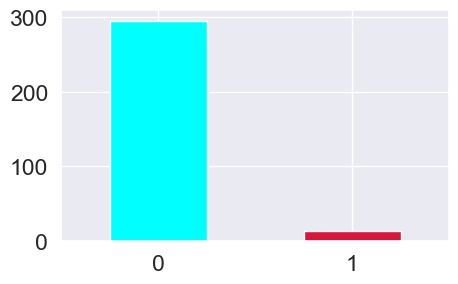

In [128]:
df['target'].value_counts().plot(kind='bar', color = ['cyan', 'crimson'], grid = True, figsize=(5,3));
plt.xticks(rotation = 0)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chol            308 non-null    float64
 1   tgl             308 non-null    float64
 2   hdl_chol        308 non-null    float64
 3   vldl_chol       308 non-null    float64
 4   chol_hdl_ratio  308 non-null    float64
 5   ldl_chol        308 non-null    float64
 6   age             308 non-null    int64  
 7   sex             308 non-null    int64  
 8   target          308 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 21.8 KB


*3. Taking Care of Missing Values*

In [130]:
# No missing values 😁
df.isna().sum()

chol              0
tgl               0
hdl_chol          0
vldl_chol         0
chol_hdl_ratio    0
ldl_chol          0
age               0
sex               0
target            0
dtype: int64

In [131]:
df.describe()

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,174.146266,156.679851,48.728266,30.873331,3.793713,140.727224,52.798701,0.649351,0.042208
std,46.558381,113.479948,12.888106,21.563180,1.184315,61.726467,14.650490,0.477950,0.201390
min,68.000000,28.190000,2.098000,5.640000,1.332209,7.000000,17.000000,0.000000,0.000000
25%,141.750000,99.000000,40.600000,19.800000,2.996753,100.500000,41.000000,0.000000,0.000000
50%,168.950000,136.000000,46.450000,26.820000,3.712941,137.850000,53.000000,1.000000,0.000000
75%,204.000000,179.250000,53.980000,36.050000,4.497236,176.100000,65.000000,1.000000,0.000000
max,314.000000,1200.000000,99.560000,240.000000,9.036145,455.000000,81.000000,1.000000,1.000000


*Heart disease frequency according to sex*

In [132]:
df.sex.value_counts()

1    200
0    108
Name: sex, dtype: int64

In [133]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,103,192
1,5,8


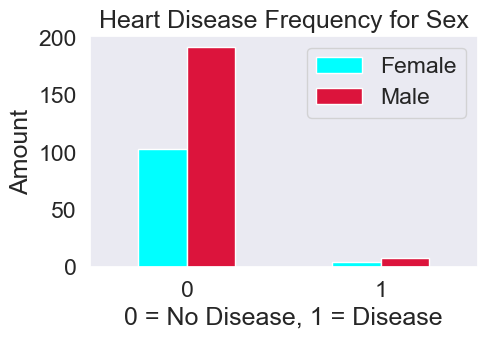

In [134]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(5,3),
                                  color=['cyan','crimson']);

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.grid()
plt.xticks(rotation = 0);

### *Age vs Cholestrol (chol)*
*Let's try combining a couple of independent variables, such as `age` and `cholestrol` (chol) and then comparing them to our target variable heart disease.
Because there are so many different values for age and cholestrol, we'll use a scatter plot.*

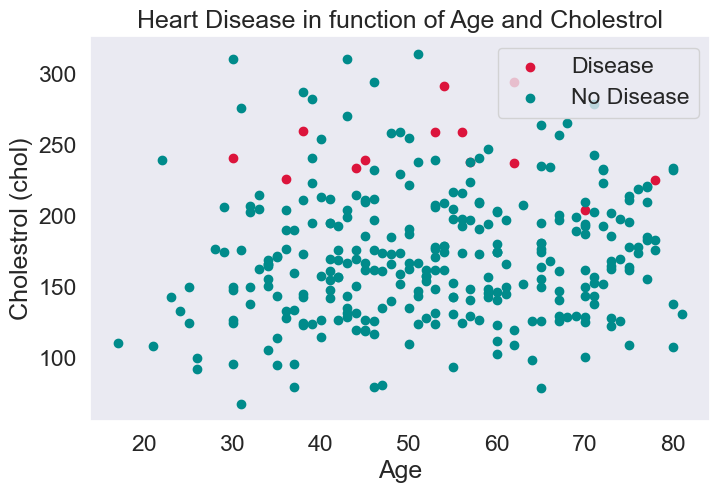

In [135]:
# Create another figure
plt.figure(figsize=(8,5))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1],
           color='crimson')


# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.chol[df.target==0],
           color='darkcyan')

# Adding some helpful info
plt.title('Heart Disease in function of Age and Cholestrol')
plt.xlabel('Age')
plt.ylabel('Cholestrol (chol)')
plt.legend(["Disease", "No Disease"]);
plt.grid()

### *What can we infer from this?*

*Cholestrol levels are seen higher in age group between 40-50.*

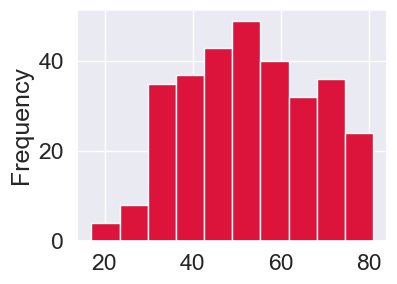

In [136]:
# Checking the distribution of the age column with a histogram
df.age.plot.hist(color = 'crimson', grid =True);

### *Correlation Matrix*
*Finally, we'll compare all of the independent variables in one hit.*
#### *But why?*

> *Because this may give an idea of which independent variables may or may not have an impact on our target variable.
We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.*

In [137]:
df.corr()

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
chol,1.000000,0.247510,0.227206,0.203005,0.682221,0.772945,0.094991,-0.039810,0.327490
tgl,0.247510,1.000000,-0.240819,0.950703,0.535819,0.472382,0.124365,0.084711,0.199179
hdl_chol,0.227206,-0.240819,1.000000,-0.248992,-0.322470,-0.092962,0.064439,-0.077145,-0.062080
vldl_chol,0.203005,0.950703,-0.248992,1.000000,0.481149,0.498768,0.138783,0.065246,0.214109
chol_hdl_ratio,0.682221,0.535819,-0.322470,0.481149,1.000000,0.724735,0.083141,0.050326,0.307015
ldl_chol,0.772945,0.472382,-0.092962,0.498768,0.724735,1.000000,0.148022,-0.000291,0.339709
age,0.094991,0.124365,0.064439,0.138783,0.083141,0.148022,1.000000,0.113161,-0.001527
sex,-0.039810,0.084711,-0.077145,0.065246,0.050326,-0.000291,0.113161,1.000000,-0.014943
target,0.327490,0.199179,-0.062080,0.214109,0.307015,0.339709,-0.001527,-0.014943,1.000000


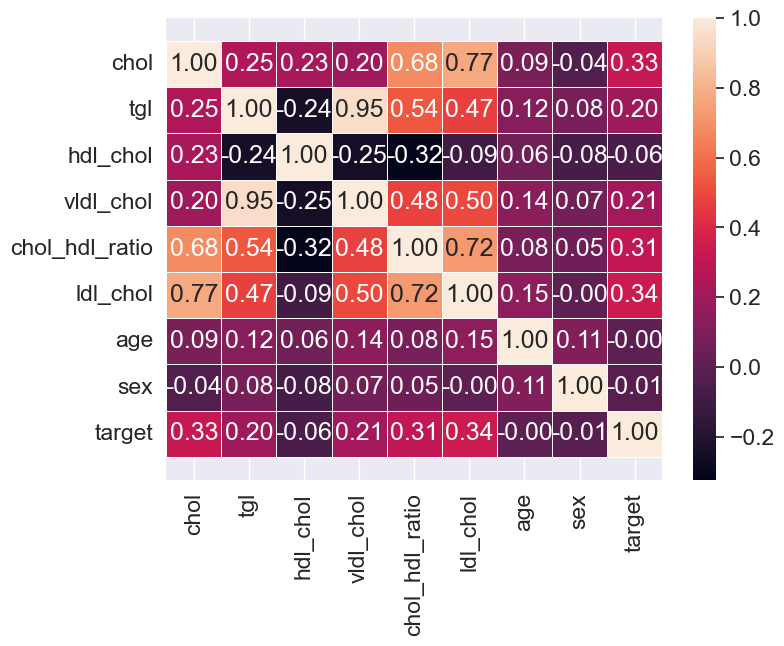

In [138]:
# Making  the correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap =None )

bottom, top = ax.get_ylim()
plt.yticks(rotation = 0)
ax.set_ylim(bottom + 0.5, top - 0.5);

*4. Taking Care of Duplicate Values*

In [139]:
data_dup = df.duplicated().any()

In [140]:
data_dup

False

*5. Data Processing*

In [141]:
cate_val = []
cont_val = []
for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [142]:
cate_val

['sex', 'target']

In [143]:
cont_val

['chol', 'tgl', 'hdl_chol', 'vldl_chol', 'chol_hdl_ratio', 'ldl_chol', 'age']

*6. Encoding Categorical Data*

In [144]:
cate_val

['sex', 'target']

In [145]:
cate_val.remove('sex')
cate_val.remove('target')
df = pd.get_dummies(df,columns = cate_val,drop_first=True)

In [146]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,143.0,53.0,69.0,10.6,2.07,84.6,23,1,0
1,100.0,81.0,53.0,16.2,1.89,63.2,26,0,0
2,132.0,66.0,76.0,13.2,1.74,69.2,43,1,0
3,95.0,52.0,46.0,10.4,2.07,59.4,35,0,0
4,109.0,87.0,52.0,17.4,2.10,74.4,75,1,0
5,162.0,149.0,43.0,29.8,3.77,148.8,53,0,0
6,120.0,244.0,31.0,48.8,3.87,137.8,44,1,0
7,199.0,176.0,35.0,35.2,5.69,199.2,43,1,0
8,96.0,54.0,40.0,10.8,2.40,66.8,30,1,0
9,237.6,201.3,45.0,40.3,5.30,152.3,57,1,1


*7. Feature Scaling*

In [147]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,143.0,53.0,69.0,10.6,2.07,84.6,23,1,0
1,100.0,81.0,53.0,16.2,1.89,63.2,26,0,0
2,132.0,66.0,76.0,13.2,1.74,69.2,43,1,0
3,95.0,52.0,46.0,10.4,2.07,59.4,35,0,0
4,109.0,87.0,52.0,17.4,2.10,74.4,75,1,0
5,162.0,149.0,43.0,29.8,3.77,148.8,53,0,0
6,120.0,244.0,31.0,48.8,3.87,137.8,44,1,0
7,199.0,176.0,35.0,35.2,5.69,199.2,43,1,0
8,96.0,54.0,40.0,10.8,2.40,66.8,30,1,0
9,237.6,201.3,45.0,40.3,5.30,152.3,57,1,1


In [148]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [149]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,-0.670061,-0.915127,1.575462,-0.941713,-1.457820,-0.910769,-2.037283,1,0
1,-1.595136,-0.667986,0.331987,-0.681588,-1.610054,-1.258024,-1.832178,0,0
2,-0.906708,-0.800383,2.119482,-0.820941,-1.736915,-1.160663,-0.669919,1,0
3,-1.702702,-0.923954,-0.212033,-0.951003,-1.457820,-1.319686,-1.216865,0,0
4,-1.401515,-0.615027,0.254270,-0.625847,-1.432448,-1.076283,1.517862,1,0
5,-0.261307,-0.067786,-0.445185,-0.049857,-0.020055,0.130996,0.013762,0,0
6,-1.164868,0.770729,-1.377791,0.832708,0.064519,-0.047500,-0.601551,1,0
7,0.534687,0.170529,-1.066922,0.200977,1.603773,0.948830,-0.669919,1,0
8,-1.681189,-0.906301,-0.678336,-0.932423,-1.178725,-1.199607,-1.558706,1,0
9,1.365103,0.393838,-0.289750,0.437876,1.273933,0.187790,0.287235,1,1


*8. Splitting The Dataset Into Training And Test Set*

In [150]:
X = df.drop('target', axis=1)

In [151]:
y = df['target']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
y_test

288    0
9      1
57     0
60     0
25     0
      ..
198    0
195    0
210    0
224    1
158    0
Name: target, Length: 62, dtype: int64

*9. Logistic Regression*

In [154]:
df.head(10)

,chol,tgl,hdl_chol,vldl_chol,chol_hdl_ratio,ldl_chol,age,sex,target
0,-0.670061,-0.915127,1.575462,-0.941713,-1.457820,-0.910769,-2.037283,1,0
1,-1.595136,-0.667986,0.331987,-0.681588,-1.610054,-1.258024,-1.832178,0,0
2,-0.906708,-0.800383,2.119482,-0.820941,-1.736915,-1.160663,-0.669919,1,0
3,-1.702702,-0.923954,-0.212033,-0.951003,-1.457820,-1.319686,-1.216865,0,0
4,-1.401515,-0.615027,0.254270,-0.625847,-1.432448,-1.076283,1.517862,1,0
5,-0.261307,-0.067786,-0.445185,-0.049857,-0.020055,0.130996,0.013762,0,0
6,-1.164868,0.770729,-1.377791,0.832708,0.064519,-0.047500,-0.601551,1,0
7,0.534687,0.170529,-1.066922,0.200977,1.603773,0.948830,-0.669919,1,0
8,-1.681189,-0.906301,-0.678336,-0.932423,-1.178725,-1.199607,-1.558706,1,0
9,1.365103,0.393838,-0.289750,0.437876,1.273933,0.187790,0.287235,1,1


In [155]:
log = LogisticRegression()
log.fit(X_train.values, y_train)

LogisticRegression()

In [156]:
y_pred1 = log.predict(X_test.values)
y_pred_prob = log.predict_proba(X_test.values)

# Extract the probabilities of the positive class (1)
y_pred_prob_pos = y_pred_prob[:, 1]

# Convert probabilities to percentages
y_pred_percent = y_pred_prob_pos * 100

# Calculate accuracy score
acc_score = accuracy_score(y_test, y_pred1)

*10. Support Vector Classifier*

In [157]:
svm = SVC()

In [158]:
svm.fit(X_train,y_train)

SVC()

In [159]:
y_pred2 = svm.predict(X_test)

In [160]:
accuracy_score(y_test,y_pred2)

0.9516129032258065

*11. K-Nearest Neighbor(KNN)*

In [161]:
knn = KNeighborsClassifier()

In [162]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [163]:
y_pred3=knn.predict(X_test)

In [164]:
accuracy_score(y_test,y_pred3)

0.9516129032258065

In [165]:
# Tuning KNN model

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [166]:
train_scores

[1.0,
 0.9878048780487805,
 0.9878048780487805,
 0.9796747967479674,
 0.975609756097561,
 0.9796747967479674,
 0.975609756097561,
 0.975609756097561,
 0.9715447154471545,
 0.9634146341463414,
 0.9634146341463414,
 0.9715447154471545,
 0.9634146341463414,
 0.9634146341463414,
 0.9634146341463414,
 0.9634146341463414,
 0.959349593495935,
 0.959349593495935,
 0.959349593495935,
 0.959349593495935]

In [167]:
test_scores

[0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065,
 0.9516129032258065]

Maximum KNN score on the test data : 95.16%


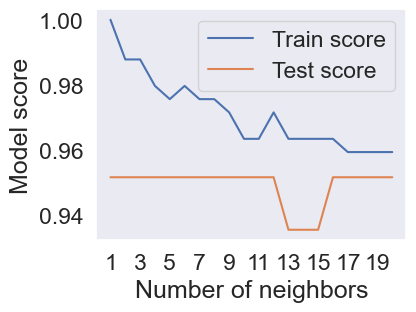

In [168]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,2))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.grid()

print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

In [169]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9516129032258065

*Non-Linear Machine Learning Algorithms*

In [170]:
df = pd.read_csv('./dataset/dummy_data.csv')

In [171]:
df = df.drop_duplicates()

In [172]:
X = df.drop('target', axis=1)
y=df['target']

In [173]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

*12. Decision Tree Classifier*

In [174]:
dt = DecisionTreeClassifier()

In [175]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [176]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [177]:
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.9516129032258065

*13. Random Forest Classifier*

In [178]:
rf = RandomForestClassifier()

In [179]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [180]:
y_pred5= rf.predict(X_test)

In [181]:
accuracy_score(y_test,y_pred5)

0.9516129032258065

*14. Gradient Boosting Classifier*

In [182]:
gbc = GradientBoostingClassifier()

In [183]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [184]:
y_pred6 = gbc.predict(X_test)

In [185]:
accuracy_score(y_test,y_pred6)

1.0

In [186]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [187]:
final_data

,Models,ACC
0,LR,93.548387
1,SVM,95.161290
2,KNN,95.161290
3,DT,95.161290
4,RF,95.161290
5,GB,100.000000


<Axes: xlabel='Models', ylabel='ACC'>

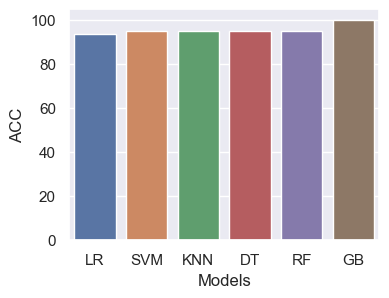

In [188]:
sns.set(rc={'figure.figsize':(4, 3)})
sns.barplot(x='Models', y='ACC', data=final_data)

In [189]:
X=df.drop('target',axis=1)
y=df['target']

In [190]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

### *Hyperparameter tuning with RandomizedSearchCV*

In [191]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

In [192]:
# Tuning LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fitting random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [193]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [194]:
rs_log_reg.score(X_test, y_test)

0.9193548387096774

In [195]:
# Tuning RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 2,
                          verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [196]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [197]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9516129032258065

### *Evaluating our tunened machine learning classifier, beyond accuracy (using cross-validation)*

In [198]:
# Make predictions with tune models
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [199]:
y_test

288    0
9      1
57     0
60     0
25     0
      ..
198    0
195    0
210    0
224    1
158    0
Name: target, Length: 62, dtype: int64

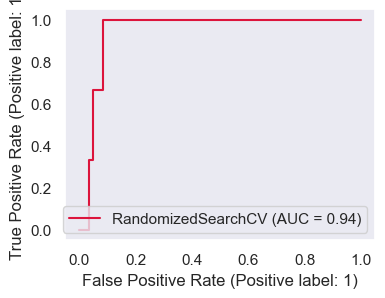

In [200]:
# Plotting ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(rs_log_reg, X_test, y_test, color="crimson")
plt.grid()
plt.show()

### *Confusion Matrix*

*A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).*

In [201]:
print(confusion_matrix(y_test, y_preds))

[[57  2]
 [ 3  0]]


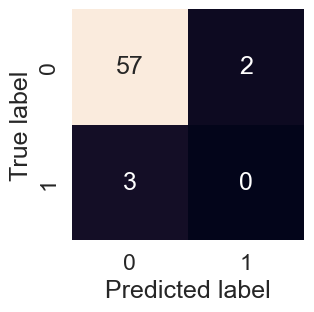

In [202]:
# Making our confusion matrix more visual
sns.set_theme(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

### *Classification report*
> *A classification report will also give us information of the precision and recall of our model for each class.*

In [203]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.00      0.00      0.00         3

    accuracy                           0.92        62
   macro avg       0.47      0.48      0.48        62
weighted avg       0.90      0.92      0.91        62



### *Calculating evaluation metrics using cross-validation*

In [204]:
# Checking best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [205]:
# Creating a new classifier with best hyperparameters
clf = LogisticRegression(
                        solver = "liblinear")

*1. Cross-validated : accuracy*

In [206]:
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "accuracy")
cv_acc

array([0.9516129 , 0.9516129 , 0.93548387, 0.96721311, 0.96721311])

In [207]:
np.mean(cv_acc)

0.9546271813855103

*2. Cross-validated : precision*`

In [208]:
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv = 5,
                              scoring = "precision")

cv_precision = np.mean(cv_precision)
cv_precision

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


0.1

*3. Cross-validated : recall*

In [209]:
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv = 5,
                              scoring = "recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.13333333333333333

*4. Cross-validated : f1-score*

In [210]:
cv_f1 = cross_val_score(clf, 
                        X, 
                        y, 
                        cv = 5, 
                        scoring = "f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.1142857142857143

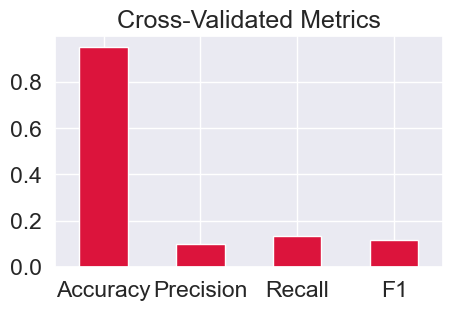

In [211]:
# Creating visualisation for cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1})

cv_metrics[:1].T.plot.bar(title = "Cross-Validated Metrics", legend = False, color ='crimson', figsize=(5, 3));
plt.xticks(rotation = 0)
plt.show()

### *Feature Importance*

*Feature importance is used to find which features contributed most to the outcomes of the model and how did they contribute?*

In [212]:
# Finding feature importance for LogisticRegression model

# Fit an instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

clf.fit(X_train, y_train);

In [213]:
# Check coef_
clf.coef_

array([[ 0.03725116, -0.01482363, -0.20811015,  0.07258728, -0.75173087,
         0.02042526, -0.03073144, -0.10138153]])

In [214]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'chol': 0.037251156782413565,
 'tgl': -0.014823629696633906,
 'hdl_chol': -0.20811015485310036,
 'vldl_chol': 0.07258728231226824,
 'chol_hdl_ratio': -0.7517308719476619,
 'ldl_chol': 0.020425259745249884,
 'age': -0.030731443123994232,
 'sex': -0.10138152700953311}

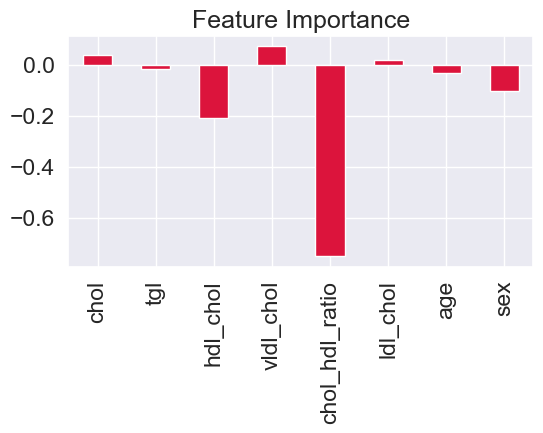

In [215]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False, grid = True, color = 'crimson', figsize = (6, 3));

In [216]:
pd.crosstab(df["chol_hdl_ratio"], df["target"])

target,0,1
chol_hdl_ratio,,
1.332209,1,0
1.687263,1,0
1.717144,1,0
1.740000,1,0
1.771095,1,0
...,...,...
7.223587,0,1
7.382199,1,0
8.200000,1,0


In [217]:
pd.crosstab(df["chol"], df["target"])

target,0,1
chol,,
68.00,1,0
79.00,1,0
80.00,1,0
80.01,1,0
81.34,1,0
...,...,...
287.00,1,0
291.00,0,1
294.00,1,1


#### *LIME vs SHAP vs ELI5*

Accuracy: 0.9516129032258065


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
X does not have valid feature names, but LogisticRegression was fitted with feature names


The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


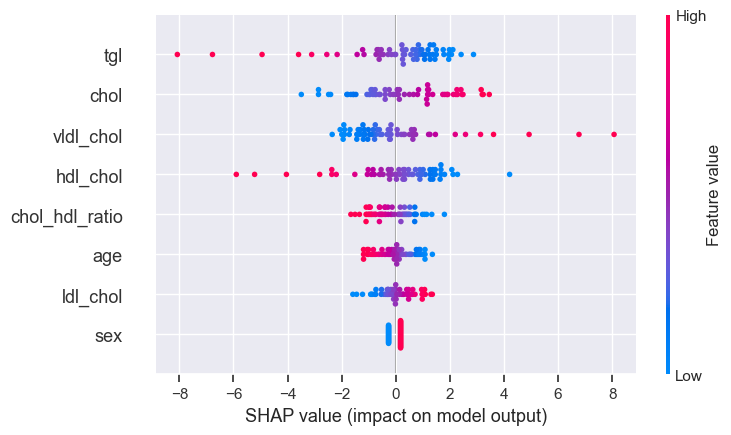

Weight,Feature
0.0516 ± 0.0875,vldl_chol
0.0290 ± 0.0376,tgl
0.0161 ± 0.0289,hdl_chol
0.0065 ± 0.0158,chol_hdl_ratio
0.0065 ± 0.0158,chol
0 ± 0.0000,sex
0 ± 0.0000,age
0 ± 0.0000,ldl_chol


In [218]:
# Load data
data =  pd.read_csv('./dataset/dummy_data.csv')
X = data.drop('target', axis=1)
y = data['target']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train logistic regression model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# Evaluate model
print('Accuracy:', model.score(X_test, y_test))

# LIME explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1'], discretize_continuous=True)
idx = 0 # index of the instance to explain
exp = explainer.explain_instance(X_test.values[idx], model.predict_proba, num_features=len(X_test.columns))
exp.show_in_notebook(show_table=True, show_all=False)

# SHAP explanation
explainer_shap = shap.LinearExplainer(model, X_train.values, feature_dependence='independent')
shap_values = explainer_shap.shap_values(X_test.values)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# ELI5 explanation
perm = PermutationImportance(model, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


> *Based on the SHAP values, the most important features for predicting heart disease are vldl_chol, tgl, and hdl_chol, with higher values of these features increasing the probability of heart disease.*

> *According to LIME, the most important features for the model's prediction are vldl_chol, tgl, and hdl_chol, which aligns with the SHAP analysis.*

> *ELI5 also indicates that vldl_chol and tgl are the most important features, with hdl_chol, chol_hdl_ratio, and chol following close behind. Overall, these results suggest that lipid profile plays a crucial role in predicting heart disease.*

#### *Saved the model*
*joblib.dump(log, 'model.joblib')*